# IMPORTANDO BIBLIOTECAS

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# CARREGANDO ARQUIVOS

In [23]:
df = pd.read_csv('log.csv', index_col=0)
df.head()

,data,municipio,estado,remedio
filename,,,,
4168749af2f8f997880e29e4096ba5e6ba1ad62d.txt.txt,2020-06-22T01:35:29Z,Rio de Janeiro,Rio de Janeiro,ivermectina
6e3f63b1c3114efeceeb85535d4f0c65d520ad99.txt.txt,2021-11-29T00:15:10Z,Rio de Janeiro,Rio de Janeiro,ivermectina
d4bebd4c02f541118eea9f36989f5526592eba8f.txt.txt,2020-11-18T03:53:22Z,Rio de Janeiro,Rio de Janeiro,ivermectina
3b53fc8cec7d0b92c6130efdf59db042e4a256c2.txt.txt,2021-07-21T04:10:08Z,Rio de Janeiro,Rio de Janeiro,ivermectina
cf6b2743f4f0721c3f09484bebab6d75c45a4d87.txt.txt,2020-08-01T07:58:25Z,Rio de Janeiro,Rio de Janeiro,ivermectina


# ANÁLISE EXPLORATÓRIA DE DADOS

## Quantas vezes cada medicamente não eficaz aparece em diários oficiais?


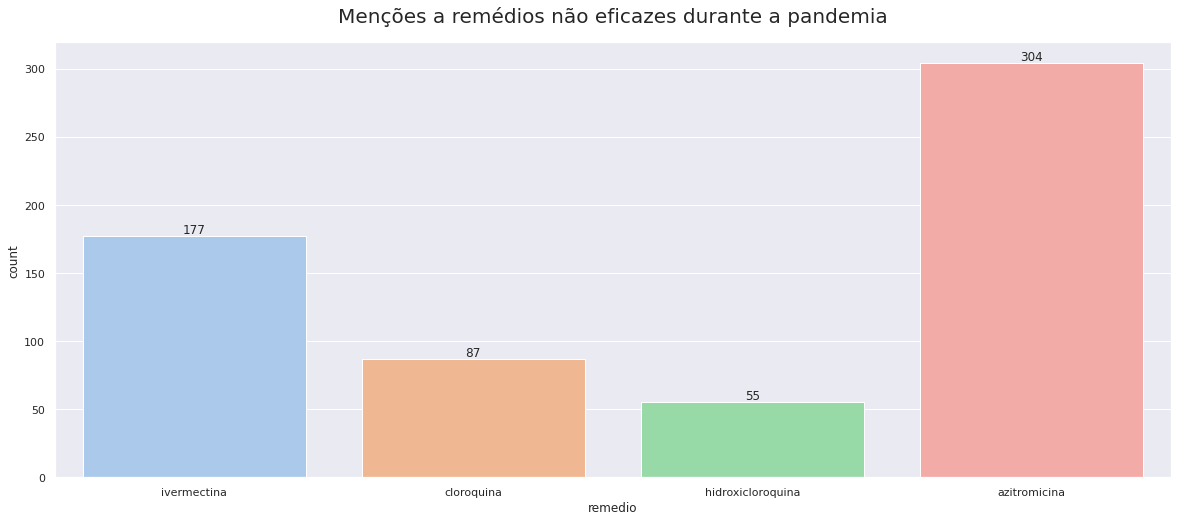

In [24]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.countplot(x = 'remedio', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])


plt.show()


## Quantas vezes cada município citou um remédio não eficaz?

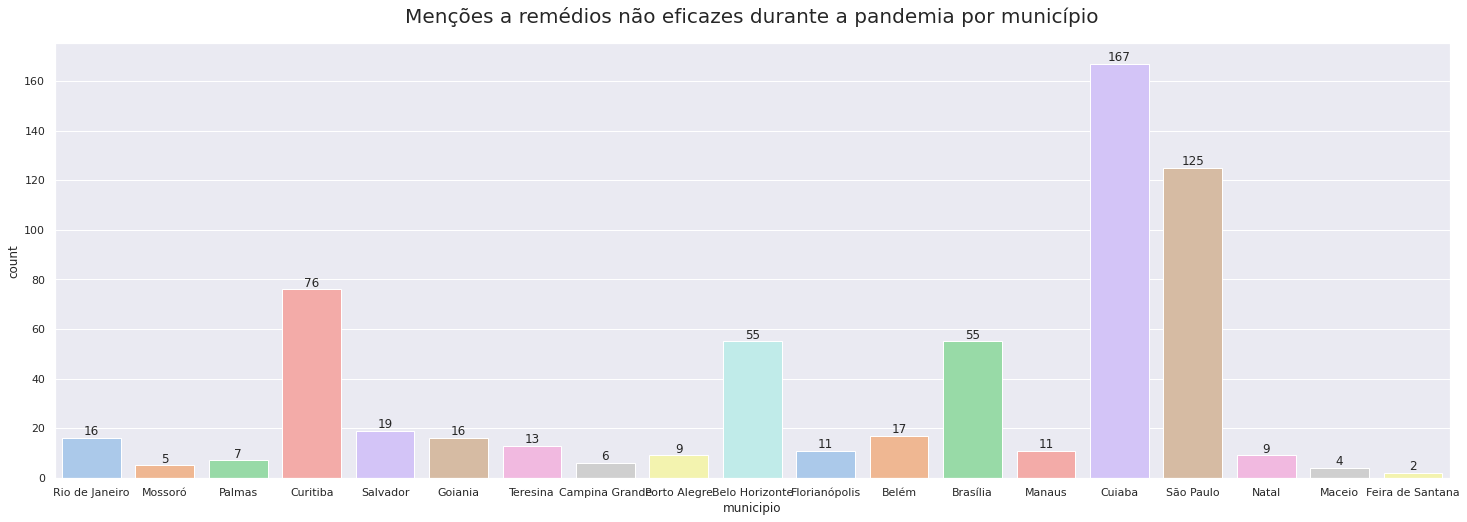

In [26]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.countplot(x = 'municipio', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia por município', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])

plt.show()

## Quantas vezes cada estado citou um remédio não eficaz?

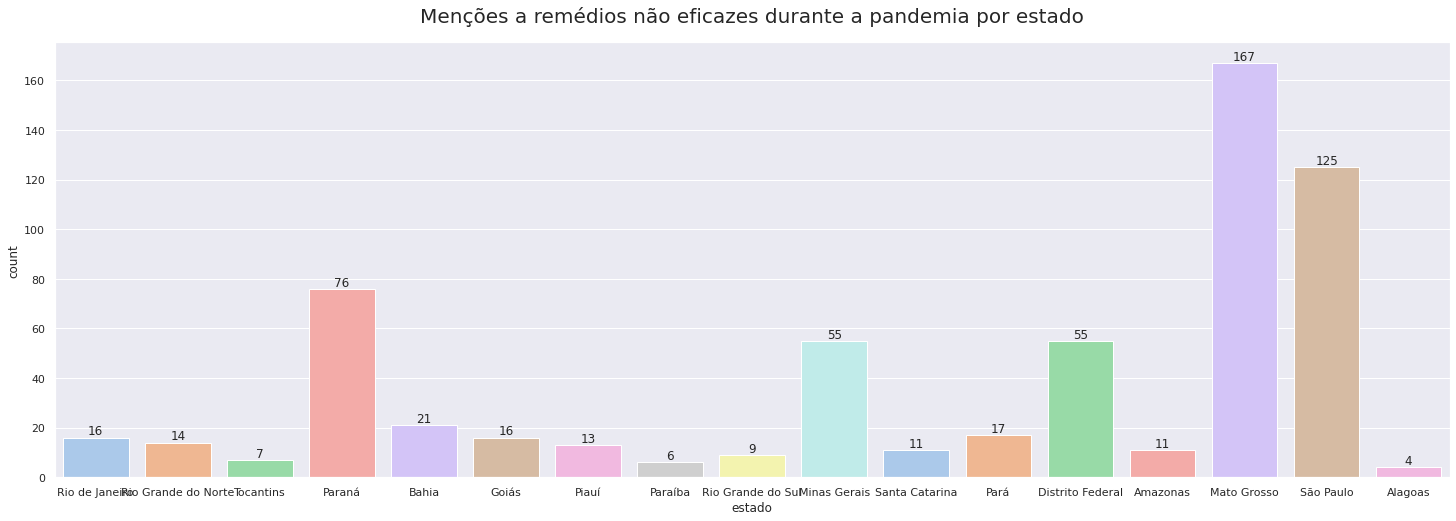

In [25]:
sns.set_theme(style = 'whitegrid')
sns.set(rc={'figure.figsize':(25,8)})
ax = sns.countplot(x = 'estado', data = df, palette = 'pastel')
ax.set_title('Menções a remédios não eficazes durante a pandemia por estado', fontsize=20, pad=20)
ax.bar_label(ax.containers[0])

plt.show()